In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv(r'/content/dataset.csv')

In [4]:
data.head()

,timestamps,TP9,AF7,AF8,TP10,Right AUX,Emotion,Subject
0,1533222560,59.105,28.320,15.137,12.207,54.199,Stressed,Subject A
1,1533222560,62.012,30.273,43.945,11.719,79.102,Stressed,Subject A
2,1533222560,44.922,30.273,-97.656,11.230,32.715,Stressed,Subject A
3,1533222560,28.809,27.832,-110.352,9.277,29.785,Stressed,Subject A
4,1533222560,36.156,28.809,-73.242,11.230,50.781,Stressed,Subject A


In [5]:
data = data.drop('Subject', axis = 1)

In [6]:
print(data.shape)

(319776, 7)


In [7]:
from pycaret.classification import *
from sklearn.model_selection import train_test_split
from pycaret.datasets import get_data

In [8]:
train_data, test_data = train_test_split(data, test_size = 0.3, random_state = 42)
new = setup(data = train_data, target = 'Emotion')

,Description,Value
0,Session id,4725
1,Target,Emotion
2,Target type,Multiclass
3,Target mapping,"Stressed: 0, neutral: 1, relaxed: 2"
4,Original data shape,"(223843, 7)"
5,Transformed data shape,"(223843, 7)"
6,Transformed train set shape,"(156690, 7)"
7,Transformed test set shape,"(67153, 7)"
8,Numeric features,6
9,Preprocess,True


In [9]:
top3 = compare_models(['knn', 'dt', 'svm', 'rf', 'lr', 'nb'], n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,3.7780
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0230
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,13.0550
nb,Naive Bayes,0.9030,0.9806,0.9030,0.9159,0.9039,0.8530,0.8590,0.9370
lr,Logistic Regression,0.3652,0.0000,0.3652,0.1334,0.1954,0.0000,0.0000,1.1420
svm,SVM - Linear Kernel,0.3294,0.0000,0.3294,0.1094,0.1640,0.0000,0.0000,38.6870


Processing:   0%|          | 0/31 [00:00<?, ?it/s]

In [10]:
for model in top3:
    print(model.get_params())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': -1, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 4725, 'splitter': 'best'}
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 4725, 'verbose': 0, 'warm_start': False}


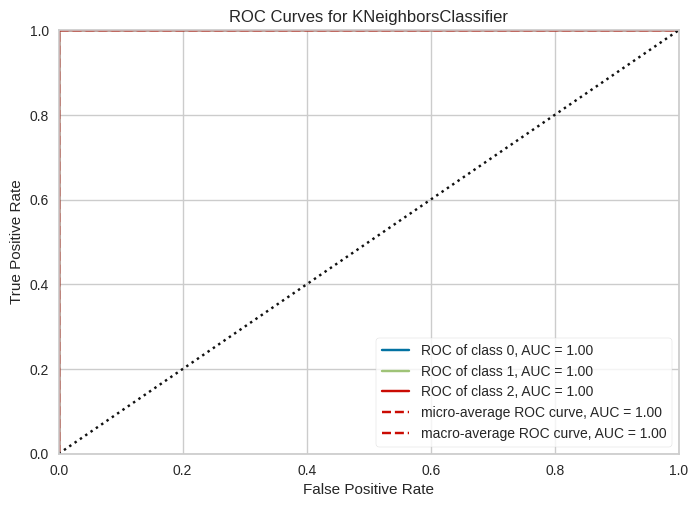

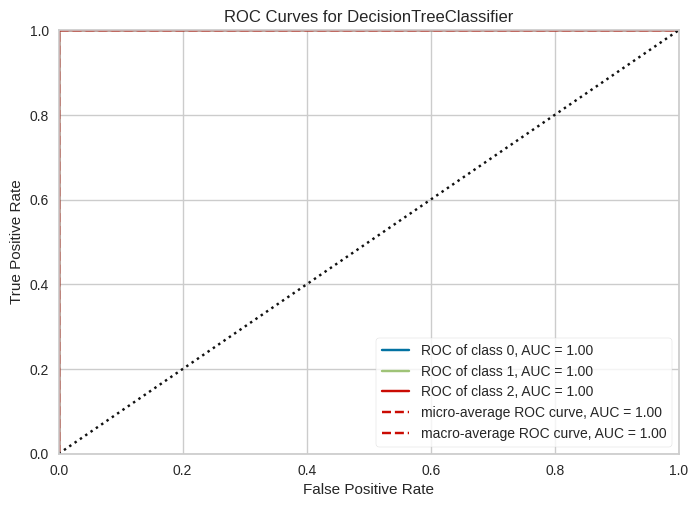

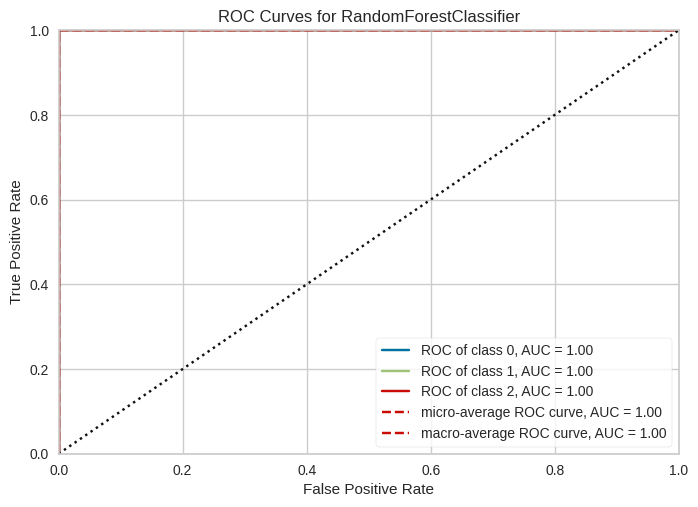

In [11]:
for model in top3:
    plot_model(model, plot = 'auc')

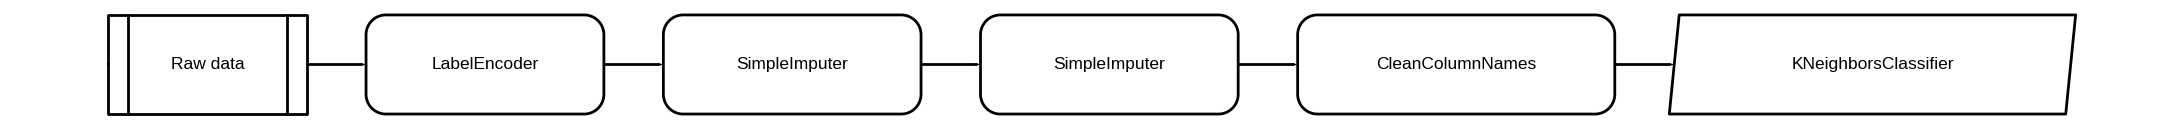

,Parameters
algorithm,auto
leaf_size,30
metric,minkowski
metric_params,None
n_jobs,-1
n_neighbors,5
p,2
weights,uniform


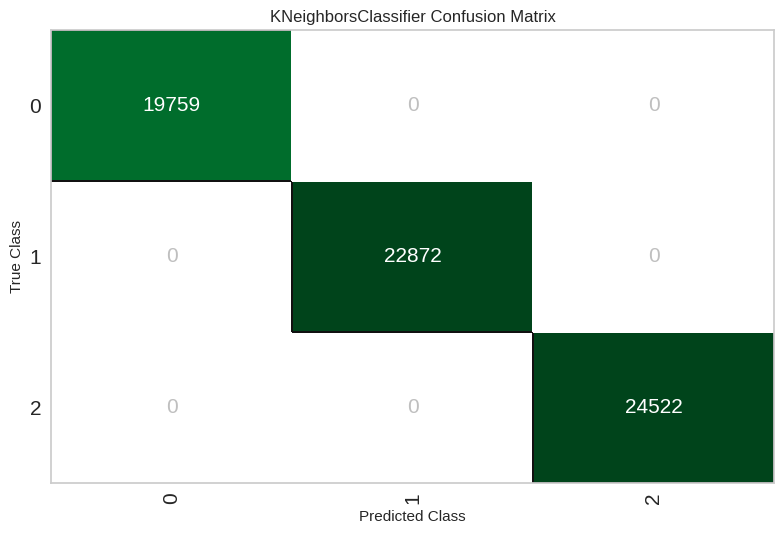

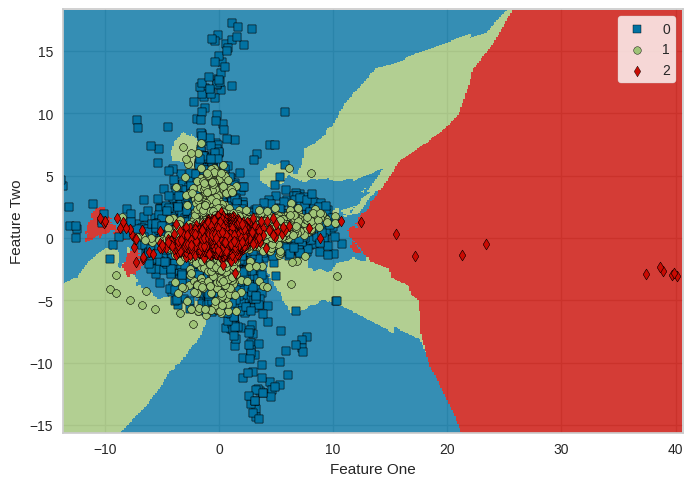

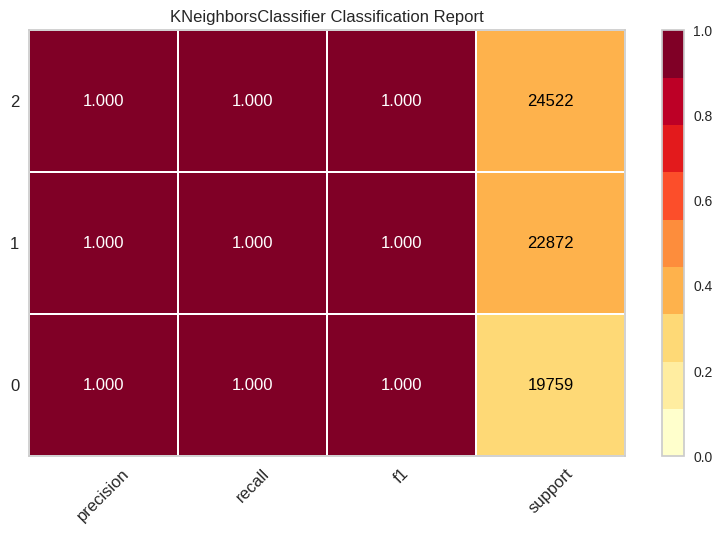

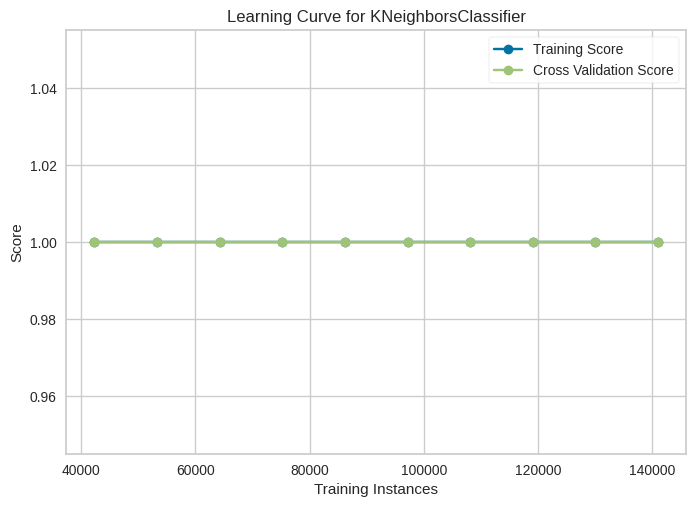

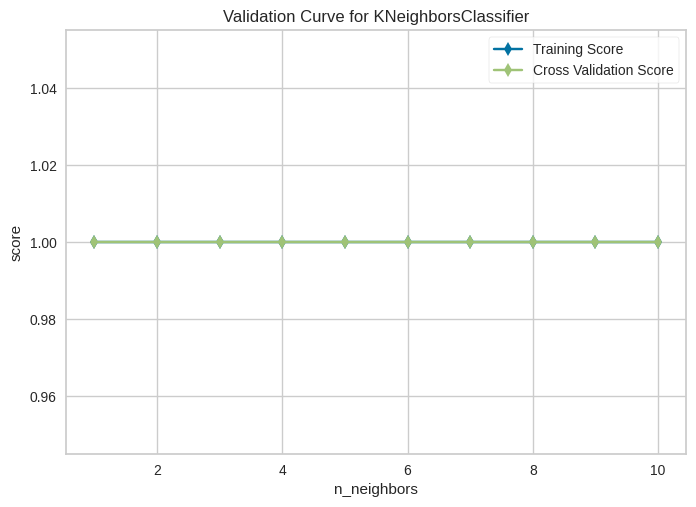

In [23]:
plot_model(top3[0], plot='pipeline')
plot_model(top3[0], plot='parameter')
plot_model(top3[0], plot='confusion_matrix')
plot_model(top3[0], plot='boundary')
plot_model(top3[0], plot='class_report')
plot_model(top3[0], plot='learning')
plot_model(top3[0], plot='vc')

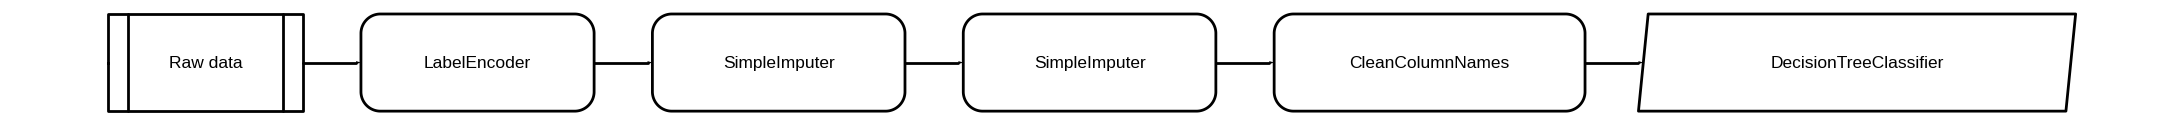

,Parameters
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,None
max_leaf_nodes,None
min_impurity_decrease,0.0
min_samples_leaf,1
min_samples_split,2
min_weight_fraction_leaf,0.0


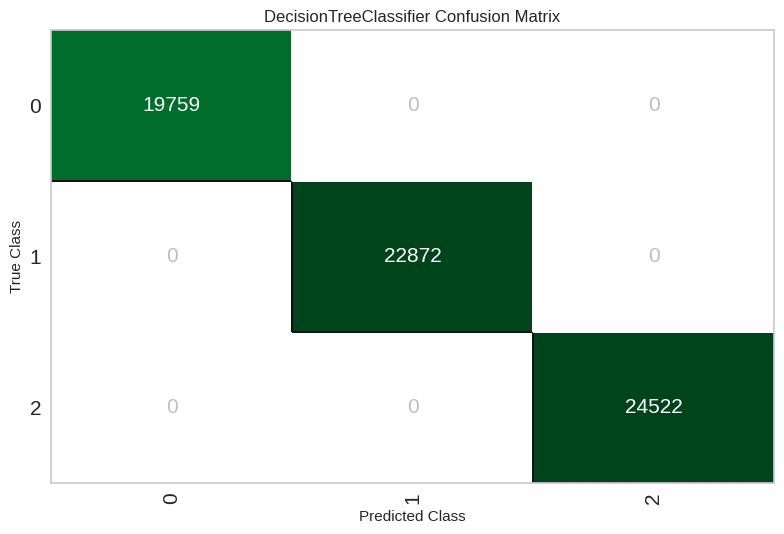

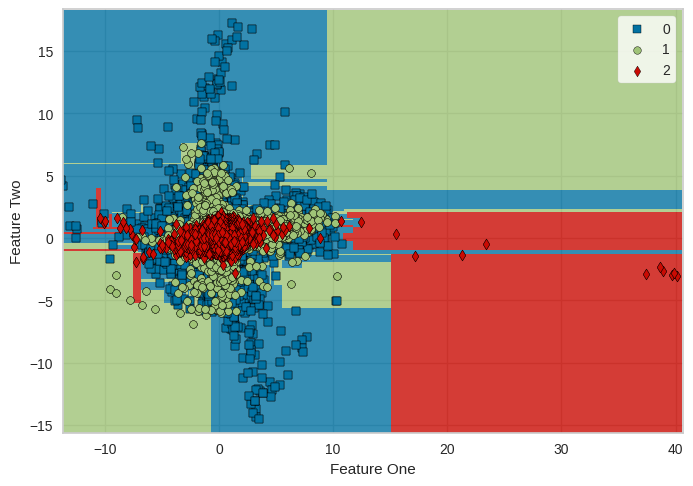

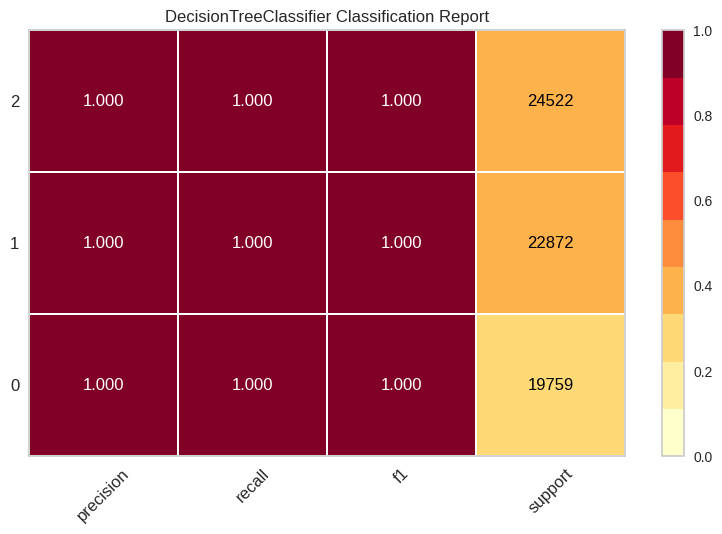

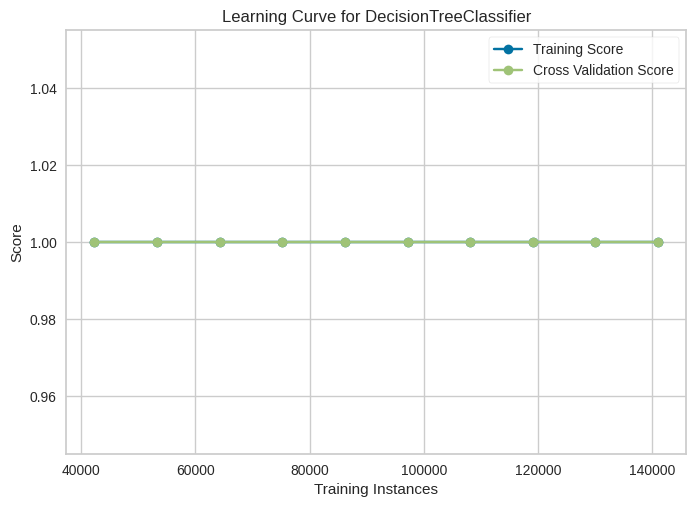

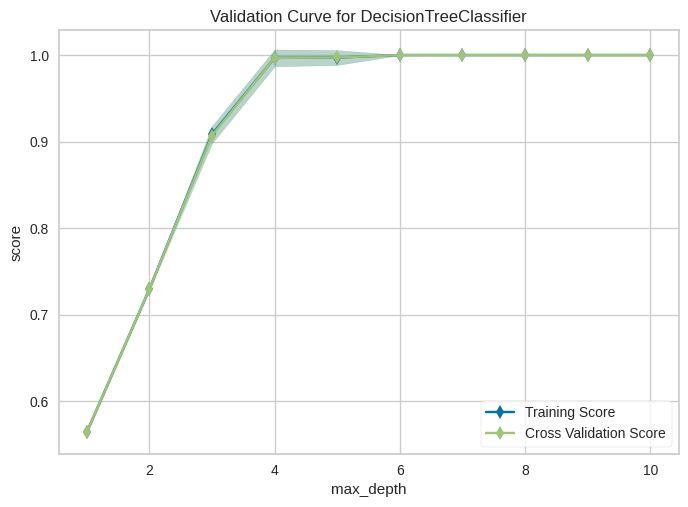

In [24]:
plot_model(top3[1], plot='pipeline')
plot_model(top3[1], plot='parameter')
plot_model(top3[1], plot='confusion_matrix')
plot_model(top3[1], plot='boundary')
plot_model(top3[1], plot='class_report')
plot_model(top3[1], plot='learning')
plot_model(top3[1], plot='vc')

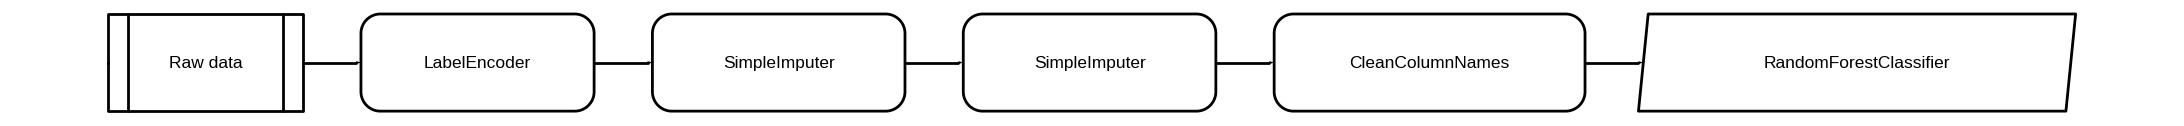

,Parameters
bootstrap,True
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,sqrt
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_samples_leaf,1


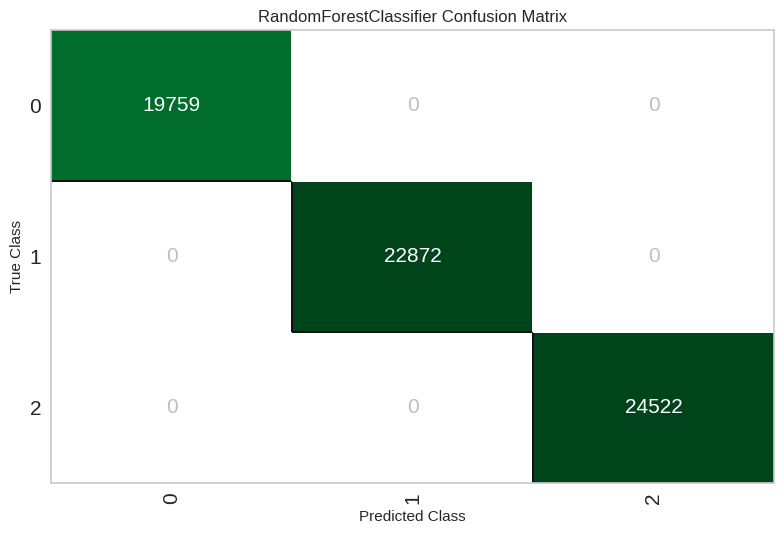

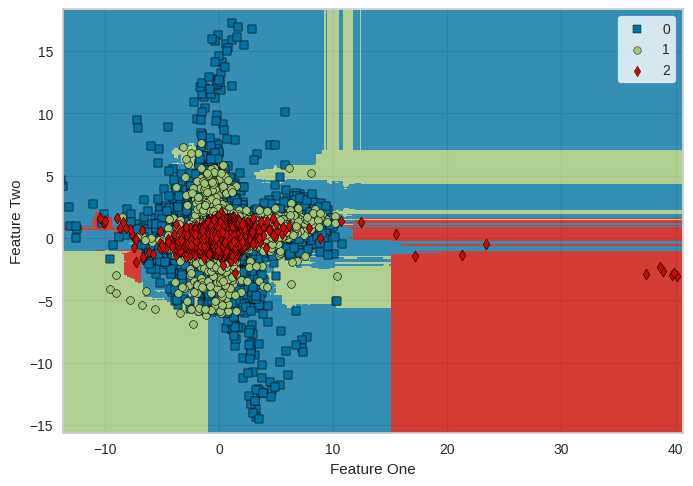

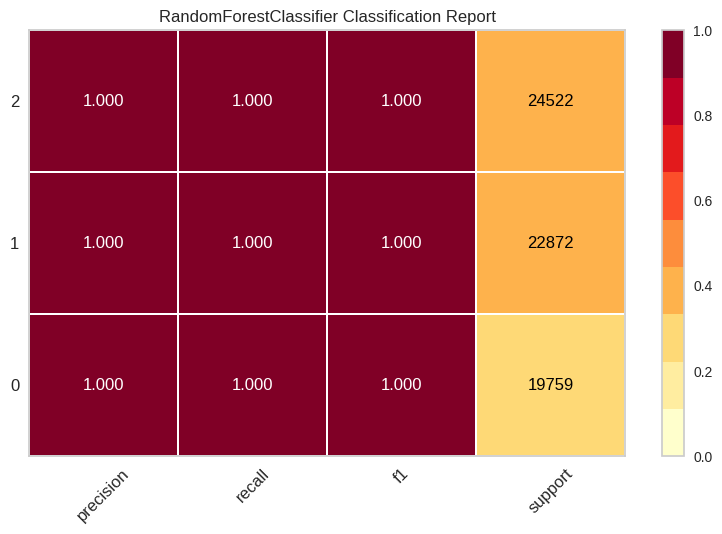

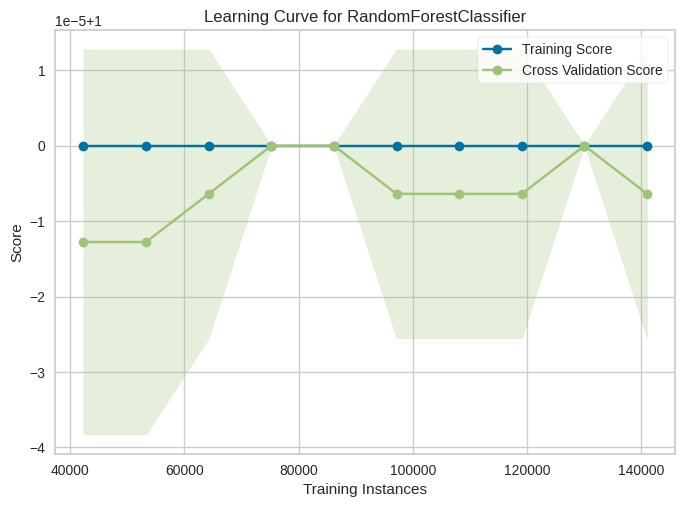

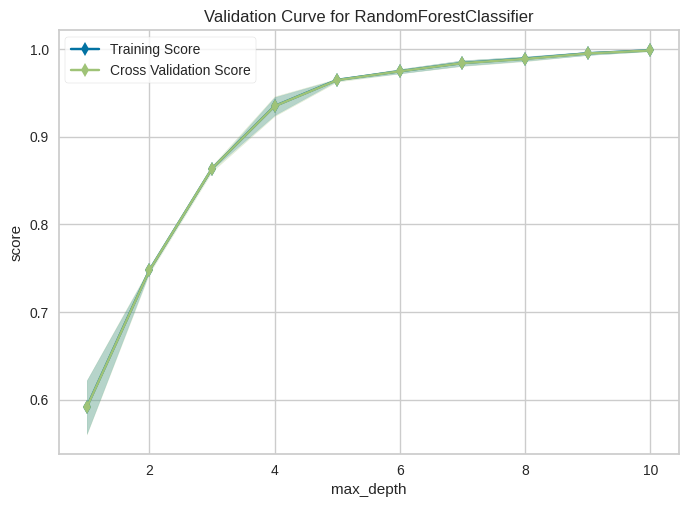

In [25]:
plot_model(top3[2], plot='pipeline')
plot_model(top3[2], plot='parameter')
plot_model(top3[2], plot='confusion_matrix')
plot_model(top3[2], plot='boundary')
plot_model(top3[2], plot='class_report')
plot_model(top3[2], plot='learning')
plot_model(top3[2], plot='vc')

In [26]:
best_model = automl(optimize = 'Accuracy')
print(best_model)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


In [27]:
tuned = tune_model(best_model)
print(tuned)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


In [28]:
predict = predict_model(tuned, data = test_data)
print(predict)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


        timestamps        TP9        AF7         AF8       TP10  Right AUX  \
172173  1533045013  28.809000  16.601999   15.625000  44.922001  47.362999   
287821  1533058184  19.531000  21.483999   -0.488000  24.414000 -51.757999   
155228  1533059875   6.348000  28.809000   19.531000 -25.879000  38.574001   
243498  1533044900  20.507999  30.273001   21.973000  21.483999  80.078003   
21524   1533222766  64.941002 -15.137000  -81.055000  27.344000  39.550999   
...            ...        ...        ...         ...        ...        ...   
31061   1533058209  18.555000  13.184000   36.132999  19.042999  22.461000   
224483  1533044174   6.836000  19.042999    9.766000  10.742000  -9.277000   
133769  1533058435  15.137000  32.227001   39.550999  22.948999  41.504002   
303023  1533054478   8.301000  31.738001   20.507999  12.695000  20.507999   
96786   1533223001  55.175999  28.320000  129.882996  27.344000  42.969002   

         Emotion prediction_label  prediction_score  
172173  S

In [32]:
from sklearn.metrics import accuracy_score
a = accuracy_score(test_data['Emotion'], predict['Emotion'])
print(a*100, " %")

100.0  %


In [33]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(predict['Emotion'], test_data['Emotion'])
print(conf)

[[28122     0     0]
 [    0 32540     0]
 [    0     0 35271]]


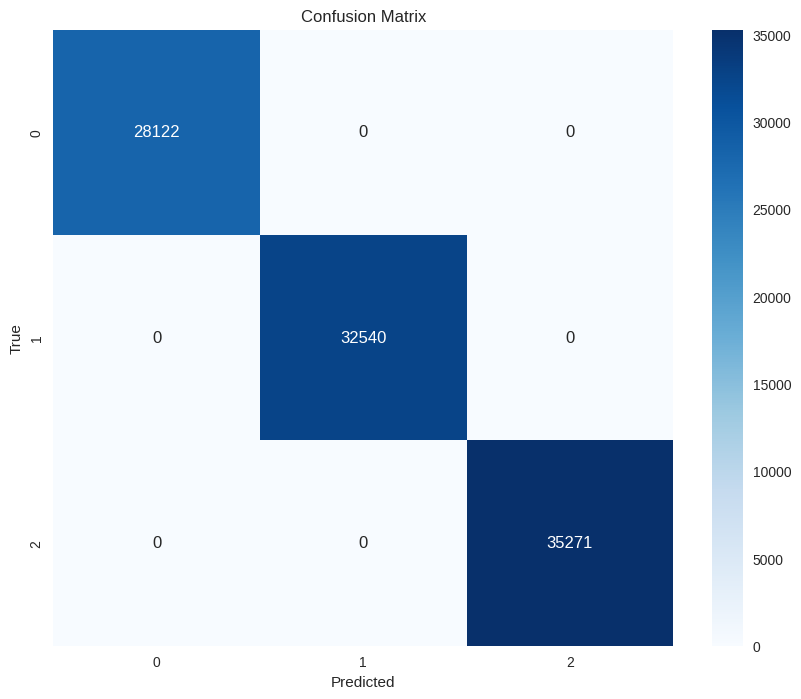

In [34]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [37]:
data = pd.read_csv(r'/content/dataset.csv')
data = data.drop('Subject', axis = 1)
data = data.replace(["Stressed", "neutral", "relaxed"], [0, 1, 2])
data

,timestamps,TP9,AF7,AF8,TP10,Right AUX,Emotion
0,1533222560,59.105,28.320,15.137,12.207,54.199,0
1,1533222560,62.012,30.273,43.945,11.719,79.102,0
2,1533222560,44.922,30.273,-97.656,11.230,32.715,0
3,1533222560,28.809,27.832,-110.352,9.277,29.785,0
4,1533222560,36.156,28.809,-73.242,11.230,50.781,0
...,...,...,...,...,...,...,...
319771,1533057257,11.230,14.648,40.039,10.254,-23.926,2
319772,1533057257,-1.465,12.207,29.297,0.000,40.039,2
319773,1533057257,-4.395,10.742,28.809,-7.812,50.293,2
319774,1533057257,29.785,11.719,29.785,1.465,-0.977,2


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319776 entries, 0 to 319775
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   timestamps  319776 non-null  int64  
 1   TP9         319776 non-null  float64
 2   AF7         319776 non-null  float64
 3   AF8         319776 non-null  float64
 4   TP10        319776 non-null  float64
 5   Right AUX   319776 non-null  float64
 6   Emotion     319776 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 17.1 MB


In [39]:
data.isnull().sum()

,0
timestamps,0
TP9,0
AF7,0
AF8,0
TP10,0
Right AUX,0
Emotion,0


In [41]:
stress_data = data[data['Emotion'] == 0]
neutral_data = data[data['Emotion'] == 1]
relaxed_data = data[data['Emotion'] == 2]

In [42]:
print(stress_data)
print(neutral_data)
print(relaxed_data)

        timestamps     TP9     AF7      AF8    TP10  Right AUX  Emotion
0       1533222560  59.105  28.320   15.137  12.207     54.199        0
1       1533222560  62.012  30.273   43.945  11.719     79.102        0
2       1533222560  44.922  30.273  -97.656  11.230     32.715        0
3       1533222560  28.809  27.832 -110.352   9.277     29.785        0
4       1533222560  36.156  28.809  -73.242  11.230     50.781        0
...            ...     ...     ...      ...     ...        ...      ...
258955  1533223084  35.645  35.645 -249.512  37.109     52.734        0
258956  1533223084  51.270  41.504  163.574  41.016      0.977        0
258957  1533223084  47.852  40.527   62.500  33.691    -25.879        0
258958  1533223084  39.062  41.016 -266.113  36.621     -3.906        0
258959  1533223084  34.180  42.969 -388.672  30.273     69.824        0

[93984 rows x 7 columns]
        timestamps     TP9     AF7     AF8    TP10  Right AUX  Emotion
28584   1533058200   4.883  22.949   8.